In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pylab as plt
import seaborn as sns

# Selección y limpieza de datos de train

In [2]:
train = pd.read_csv('../data/train.csv')
train.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2842228,20211205213126,2021-12-06,Your little appartment on wheels,A waggon luxurous designed as a hotel room on ...,"Waterland is a beautiful countryside area, wit...",https://a0.muscache.com/pictures/cc2aa51a-3c11...,3040748,https://www.airbnb.com/users/show/3040748,Henk,2012-07-24,"Amsterdam, North Holland, The Netherlands","Living in the countryside, just near Amsterdam...",within a few hours,100%,75%,f,https://a0.muscache.com/im/users/3040748/profi...,https://a0.muscache.com/im/users/3040748/profi...,NaN,13,13,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Noord-Oost,NaN,52.39508,4.99186,Private room in farm stay,Private room,3,NaN,1.5 shared baths,1.0,NaN,"[""First aid kit"", ""Free parking on premises"", ...",87.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,249,2021-12-06,81,0,0,2014-08-03,2019-06-15,4.62,4.56,4.29,4.57,4.75,4.69,4.49,0363 2A6D 7C09 877D 715F,f,10,0,10,0,0.91
1,1,https://www.airbnb.com/rooms/41236669,20211205213126,2021-12-06,Spacious 4p city center apartment (2 bedrooms!),Are you looking for a perfect place to stay in...,Our home is located in the Plantagebuurt. A un...,https://a0.muscache.com/pictures/5f33bf5a-399c...,34773624,https://www.airbnb.com/users/show/34773624,Julie,2015-06-01,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/a5da3...,https://a0.muscache.com/im/pictures/user/a5da3...,Weesperbuurt en Plantage,0,0,"['email', 'phone', 'reviews']",t,f,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,NaN,52.36371,4.90745,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Hot water kettle"", ""Pocket wifi"", ""Stove"", ""...",250.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,3,3,3,3,2021-12-06,9,4,1,2020-01-26,2021-09-05,5.00,5.00,5.00,4.89,5.00,5.00,4.89,0363 BD0E 9934 ACCA D3DE,f,1,1,0,0,0.40


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4167 non-null   int64  
 1   listing_url                                   4167 non-null   object 
 2   scrape_id                                     4167 non-null   int64  
 3   last_scraped                                  4167 non-null   object 
 4   name                                          4167 non-null   object 
 5   description                                   4159 non-null   object 
 6   neighborhood_overview                         3004 non-null   object 
 7   picture_url                                   4167 non-null   object 
 8   host_id                                       4167 non-null   int64  
 9   host_url                                      4167 non-null   o

Hago la siguiente selección de columnas por la importancia que yo le daría al modelo y porque la cantidad de nulos es pequqña y salvable

## Columnas escogidas

In [4]:
df = train[['id', 'host_id', 'property_type', 'room_type', 'accommodates',
               'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_30', 'number_of_reviews',
               'review_scores_rating', 'host_listings_count', 'bathrooms_text']]
df.head(2)

,id,host_id,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listings_count,bathrooms_text
0,0,3040748,Private room in farm stay,Private room,3,1.0,NaN,87.0,2,0,81,4.62,13,1.5 shared baths
1,1,34773624,Entire rental unit,Entire home/apt,4,2.0,2.0,250.0,2,3,9,5.00,0,1 bath


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4167 non-null   int64  
 1   host_id               4167 non-null   int64  
 2   property_type         4167 non-null   object 
 3   room_type             4167 non-null   object 
 4   accommodates          4167 non-null   int64  
 5   bedrooms              3914 non-null   float64
 6   beds                  3993 non-null   float64
 7   price                 4167 non-null   float64
 8   minimum_nights        4167 non-null   int64  
 9   availability_30       4167 non-null   int64  
 10  number_of_reviews     4167 non-null   int64  
 11  review_scores_rating  3790 non-null   float64
 12  host_listings_count   4167 non-null   int64  
 13  bathrooms_text        4159 non-null   object 
dtypes: float64(4), int64(7), object(3)
memory usage: 455.9+ KB


### Limpieza de estas columnas

Vamos a borrar todos los nulos exceptuando los de 'review_scores_rating', y además, se convertirá la columnas de 'bathrooms_text' a numérico y se borrarán las incosistencias del tipo "precio=0" o "bedrooms=0"

In [6]:
# dropeamos las filas nulas de esas columnas

original = len(df)
to_null = ['property_type', 'bedrooms', 'beds', 'bathrooms_text']

df = df.dropna(subset=to_null, axis=0, how='any')
    
print('Number of NaN values removed:', original - len(df))

Number of NaN values removed: 406


In [8]:
# Veamos los valores nulos que hay en los score_rating

print('Numero de review scores ratings nulos:', len(df['review_scores_rating'][df['review_scores_rating'].isnull()]))

Numero de review scores ratings nulos: 333


In [9]:
# explore distribution of accommodates
print('Numero de Unique Accomodation: ', np.unique(df['accommodates']))
for i in range(1, 17):
    print('Accommodation {}:'.format(i), len(df[df['accommodates'] == i]))

Numero de Unique Accomodation:  [ 1  2  3  4  5  6  7  8 10 12 13 14 16]
Accommodation 1: 111
Accommodation 2: 1899
Accommodation 3: 275
Accommodation 4: 1244
Accommodation 5: 77
Accommodation 6: 101
Accommodation 7: 15
Accommodation 8: 18
Accommodation 9: 0
Accommodation 10: 1
Accommodation 11: 0
Accommodation 12: 5
Accommodation 13: 1
Accommodation 14: 2
Accommodation 15: 0
Accommodation 16: 12


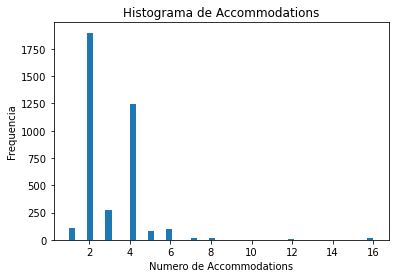

In [10]:
# Visualización de las accomodations
plt.hist(df['accommodates'], bins=50)
plt.title("Histograma de Accommodations")
plt.xlabel("Numero de Accommodations")
plt.ylabel("Frequencia")
plt.show()

In [11]:
print('Number of Unique Beds: ', np.unique(df['beds']))
for i in range(1, 17):
    print('Beds {}:'.format(i), len(df[df['beds'] == i]))

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8. 10. 11. 12. 13. 14. 16. 17. 18. 20. 24.
 33.]
Beds 1: 1884
Beds 2: 991
Beds 3: 438
Beds 4: 266
Beds 5: 97
Beds 6: 46
Beds 7: 7
Beds 8: 12
Beds 9: 0
Beds 10: 1
Beds 11: 3
Beds 12: 1
Beds 13: 1
Beds 14: 3
Beds 15: 0
Beds 16: 2


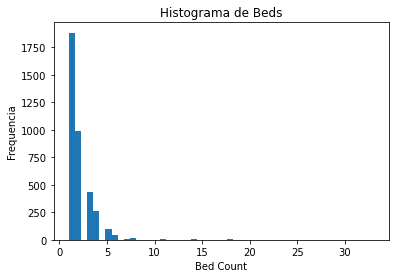

In [12]:
# visualize distribution of beds
plt.hist(df['beds'], bins=50)
plt.title("Histograma de Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequencia")
plt.show()

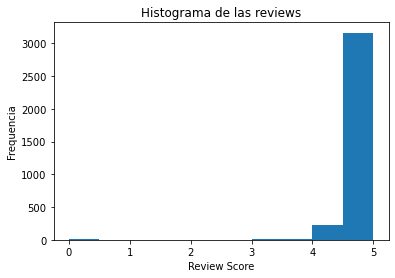

In [13]:
# distribucion of review scores ratings
plt.hist(df['review_scores_rating'][~df['review_scores_rating'].isnull()])
plt.title("Histograma de las reviews")
plt.xlabel("Review Score")
plt.ylabel("Frequencia")
plt.show()

Vamos a arreglar los valores nulos de los rating scores

In [14]:
# cambiamos los reviews score con 0 visitas y valores nulos, por No reviews
indices = df['review_scores_rating'][df['number_of_reviews'] == 0].index.values.tolist()
df.loc[indices, ('review_scores_rating')] = df['review_scores_rating'][df['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

# fuera nulos
df = df[~df['review_scores_rating'].isnull()]

In [15]:
# Vamos a cambiar los valores unicos por rangos

def ranguificador(val):
    
    if val == 'No Reviews':
        return 'No Reviews'
    
    elif val >= 4.50:
        return '4.50-5.0'
    
    elif val >= 4.0 and val < 4.50:
        return '4.0-4.50'
    
    elif val >= 3.50 and val < 4.0:
        return '3.50-4.0'
    
    elif val >= 3.0 and val < 3.50:
        return '3.0-3.50'
    
    elif val >= 2.50 and val < 3.0:
        return '2.50-3.0'
    
    elif val >= 2.0 and val < 2.50:
        return '2.0-2.50'
    
    elif val >= 1.50 and val < 2.0:
        return '1.50-2.0'
    
    elif val >= 1.0 and val < 1.50:
        return '1.0-1.50'
    
    elif val < 1.0:
        return '0-1.0'
    
df['review_scores_rating'] = df['review_scores_rating'].apply(ranguificador)
print('Valores unicos:', np.unique(df['review_scores_rating']))

Valores unicos: ['0-1.0' '1.0-1.50' '2.0-2.50' '2.50-3.0' '3.0-3.50' '3.50-4.0' '4.0-4.50'
 '4.50-5.0']


In [16]:
print('Number of remaining records:', len(df))

Number of remaining records: 3428


In [17]:
df.head(2)

,id,host_id,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listings_count,bathrooms_text
1,1,34773624,Entire rental unit,Entire home/apt,4,2.0,2.0,250.0,2,3,9,4.50-5.0,0,1 bath
2,2,203731852,Room in serviced apartment,Hotel room,2,1.0,1.0,151.0,1,25,47,4.50-5.0,20,1 private bath


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 1 to 4166
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3428 non-null   int64  
 1   host_id               3428 non-null   int64  
 2   property_type         3428 non-null   object 
 3   room_type             3428 non-null   object 
 4   accommodates          3428 non-null   int64  
 5   bedrooms              3428 non-null   float64
 6   beds                  3428 non-null   float64
 7   price                 3428 non-null   float64
 8   minimum_nights        3428 non-null   int64  
 9   availability_30       3428 non-null   int64  
 10  number_of_reviews     3428 non-null   int64  
 11  review_scores_rating  3428 non-null   object 
 12  host_listings_count   3428 non-null   int64  
 13  bathrooms_text        3428 non-null   object 
dtypes: float64(3), int64(7), object(4)
memory usage: 401.7+ KB


In [19]:
property_dummies = pd.get_dummies(df['property_type'])
room_dummies = pd.get_dummies(df['room_type'])
ratings_scores_dummies = pd.get_dummies(df['review_scores_rating'])

# metemos los dummies
df_def = pd.concat((df.drop(['property_type', 'room_type', 'review_scores_rating'], axis=1), \
    property_dummies.astype(int), \
    room_dummies.astype(int), ratings_scores_dummies.astype(int)), \
    axis=1)

print('Number of Columns:', len(df_def.columns))

# metemos el price al final
cols = list(df_def.columns.values)
idx = cols.index('price')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
df_def = df_def[rearrange_cols]

Number of Columns: 68


In [20]:
# Arreglar bathroom_text
import re

def numero(string):
    try:
        return float(re.findall(r'[-+]?\d*\.\d+|\d+', string)[0])
    except:
        return 0

df_def['bathrooms_text'] = df_def['bathrooms_text'].apply(numero)
mean = df_def['bathrooms_text'].mean()
df_def['bathrooms_text'] = df_def['bathrooms_text'].fillna(mean)
# pruebo a rellenar con 0's en vez de nulos para luego ver si 

In [21]:
def standar(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

In [22]:
df_def.columns

Index(['id', 'host_id', 'accommodates', 'bedrooms', 'beds', 'minimum_nights',
       'availability_30', 'number_of_reviews', 'host_listings_count',
       'bathrooms_text', 'Barn', 'Boat', 'Entire cabin', 'Entire chalet',
       'Entire condominium (condo)', 'Entire cottage', 'Entire guest suite',
       'Entire guesthouse', 'Entire loft', 'Entire place',
       'Entire rental unit', 'Entire residential home',
       'Entire serviced apartment', 'Entire townhouse', 'Entire villa',
       'Houseboat', 'Private room', 'Private room',
       'Private room in bed and breakfast', 'Private room in boat',
       'Private room in cabin', 'Private room in casa particular',
       'Private room in condominium (condo)', 'Private room in farm stay',
       'Private room in guest suite', 'Private room in guesthouse',
       'Private room in hostel', 'Private room in houseboat',
       'Private room in loft', 'Private room in rental unit',
       'Private room in residential home',
       'Private r

In [23]:
non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'bathrooms_text', 'host_listings_count', 'availability_30', 'minimum_nights']

for col in non_cat_vars:
    df_def[col] = df_def[col].astype(float)
    df_def[col] = standar(df_def[col])
    
df_def.head()

,id,host_id,accommodates,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,host_listings_count,bathrooms_text,Barn,Boat,Entire cabin,Entire chalet,Entire condominium (condo),Entire cottage,Entire guest suite,Entire guesthouse,Entire loft,Entire place,Entire rental unit,Entire residential home,Entire serviced apartment,Entire townhouse,Entire villa,Houseboat,Private room,Private room,Private room in bed and breakfast,Private room in boat,Private room in cabin,Private room in casa particular,Private room in condominium (condo),Private room in farm stay,Private room in guest suite,Private room in guesthouse,Private room in hostel,Private room in houseboat,Private room in loft,Private room in rental unit,Private room in residential home,Private room in serviced apartment,Private room in tiny house,Private room in townhouse,Private room in villa,Room in aparthotel,Room in bed and breakfast,Room in boutique hotel,Room in hostel,Room in hotel,Room in serviced apartment,Shared room in hostel,Shared room in houseboat,Shared room in rental unit,Shared room in residential home,Tower,Entire home/apt,Hotel room,Private room,Private room,Shared room,0-1.0,1.0-1.50,2.0-2.50,2.50-3.0,3.0-3.50,3.50-4.0,4.0-4.50,4.50-5.0,price
1,1,34773624,0.707258,0.458964,0.014071,-0.069997,-0.482293,9,-0.312573,-0.585593,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,250.0
2,2,203731852,-0.666385,-0.639729,-0.588852,-0.110556,1.861755,47,2.619832,-0.585593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,151.0
3,3,68783888,-0.666385,-0.639729,-0.588852,-0.069997,-0.801936,10,-0.165953,0.491923,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,139.0
4,4,5297940,-0.666385,-0.639729,0.014071,-0.069997,1.115922,166,-0.165953,0.491923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,95.0
5,5,1557835,-0.666385,-0.639729,-0.588852,-0.029437,2.074851,101,-0.019333,-0.585593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,140.0


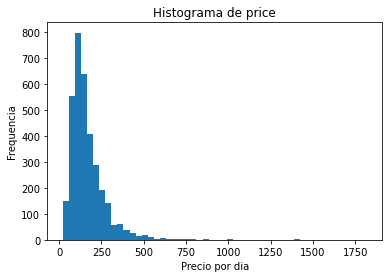

In [24]:
# Viduslizacion del precio por dia

plt.hist(df['price'], bins=50)
plt.title("Histograma de price")
plt.xlabel("Precio por dia")
plt.ylabel("Frequencia")
plt.show()

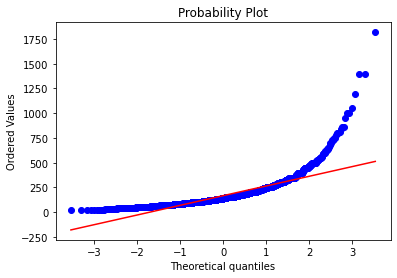

In [25]:
# grafica para el precio sin transformar

from scipy import stats
import pylab

stats.probplot(df_def['price'], dist="norm", plot=pylab)
pylab.show()

In [26]:
import math

minimo = df_def['price'].min() # es como -1.27

df_def['price_log'] = df_def['price'].apply(lambda x: math.log(x+2))

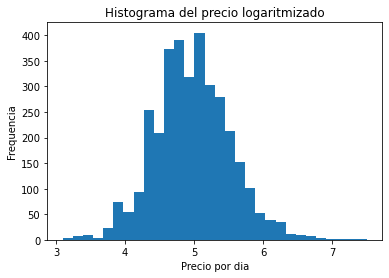

In [27]:
# histograma del precio transformado con un log

plt.hist(df_def['price_log'], bins=30)
plt.title("Histograma del precio logaritmizado")
plt.xlabel("Precio por dia")
plt.ylabel("Frequencia")
plt.show()

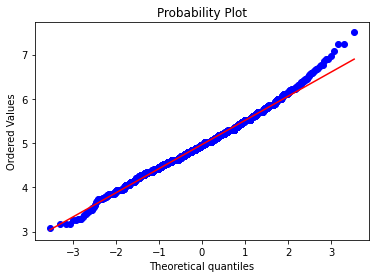

In [28]:
# grafica de probabilidad para el precio transformado

stats.probplot(df_def['price_log'], dist="norm", plot=pylab)
pylab.show()

In [29]:
#df_def.to_csv('../data/train_cleaned.csv')

# Limpieza de test

In [30]:
test = pd.read_csv('../data/test.csv')
test.shape

(1389, 73)

In [31]:
df2 = test[['id', 'host_id', 'property_type', 'room_type', 'accommodates',
               'bedrooms', 'beds', 'minimum_nights', 'availability_30', 'number_of_reviews',
               'review_scores_rating', 'host_listings_count','bathrooms_text']]
df2.shape

(1389, 13)

In [32]:
# modificamos las filas nulas de esas columnas

df2.property_type.fillna(0, inplace=True)
df2.bedrooms.fillna(0, inplace=True)
df2.beds.fillna(0, inplace=True)
df2.shape

(1389, 13)

In [33]:
# Veamos si hay valores inconsistentes

print('Numero de Accommodates 0:', len(df2[df2['accommodates'] == 0]))
print('Numero de Bedrooms 0:', len(df2[df2['bedrooms'] == 0]))
print('Numero de Beds 0:', len(df2[df2['beds'] == 0]))

Numero de Accommodates 0: 2
Numero de Bedrooms 0: 72
Numero de Beds 0: 77


In [34]:
# cambiamos los reviews score con 0 visitas y valores nulos, por No reviews
indices = df2['review_scores_rating'][df2['number_of_reviews'] == 0].index.values.tolist()
df2.loc[indices, ('review_scores_rating')] = df2['review_scores_rating'][df2['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

# fuera nulos
df2.review_scores_rating.fillna(df2.review_scores_rating.mean(), inplace=True)
df2.shape

(1389, 13)

In [35]:
df2['review_scores_rating'] = df2['review_scores_rating'].apply(ranguificador)
print('Valores unicos:', np.unique(df2['review_scores_rating']))

Valores unicos: ['0-1.0' '3.0-3.50' '3.50-4.0' '4.0-4.50' '4.50-5.0']


In [36]:
property_dummies = pd.get_dummies(df2['property_type'])
room_dummies = pd.get_dummies(df2['room_type'])
ratings_scores_dummies = pd.get_dummies(df2['review_scores_rating'])

# metemos los dummies
df_def2 = pd.concat((df2.drop(['property_type', 'room_type', 'review_scores_rating'], axis=1), \
    property_dummies.astype(int), \
    room_dummies.astype(int), ratings_scores_dummies.astype(int)), \
    axis=1)

print('Number of Columns:', len(df_def2.columns))

Number of Columns: 65


In [37]:
df_def2['bathrooms_text'] = df_def2['bathrooms_text'].apply(numero)
mean = df_def['bathrooms_text'].mean()
df_def2['bathrooms_text'] = df_def2['bathrooms_text'].fillna(mean)

In [38]:
non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'host_listings_count', 'availability_30', 'minimum_nights', 'bathrooms_text']

for col in non_cat_vars:
    df_def2[col] = df_def2[col].astype(float)
    df_def2[col] = standar(df_def2[col])
    
df_def2.shape

(1389, 65)

# Ajuste de columnas

In [39]:
train_cols = list(df_def.columns)
len(train_cols)

71

In [40]:
test_cols = list(df_def2.columns)
len(test_cols)

65

In [41]:
tr_tst = [train_cols[i] for i in range(len(train_cols)) if train_cols[i] not in test_cols\
          and train_cols[i] != 'price' and train_cols[i] != 'price_log']

tr_tst

['Barn',
 'Entire cabin',
 'Entire chalet',
 'Entire place',
 'Private room in farm stay',
 'Private room in tiny house',
 'Shared room in residential home',
 'Tower',
 '1.0-1.50',
 '2.0-2.50',
 '2.50-3.0']

In [42]:
tst_tr = [test_cols[i] for i in range(len(test_cols)) if test_cols[i] not in train_cols]
tst_tr

['Bus',
 'Camper/RV',
 'Entire vacation home',
 'Private room in bungalow',
 'Private room in island',
 'Private room in nature lodge',
 'Room in casa particular',
 'Shared room in bed and breakfast',
 'Tiny house']

## Eliminacion de las columnas que aparecen en tr_tst en 'df_def' y viceversa

In [43]:
df_def.drop(tr_tst, axis=1, inplace=True)

In [44]:
df_def2.drop(tst_tr, axis=1, inplace=True)

In [45]:
df_def2.head()

,id,host_id,accommodates,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,host_listings_count,bathrooms_text,Boat,Entire condominium (condo),Entire cottage,Entire guest suite,Entire guesthouse,Entire loft,Entire rental unit,Entire residential home,Entire serviced apartment,Entire townhouse,Entire villa,Houseboat,Private room,Private room in bed and breakfast,Private room in boat,Private room in cabin,Private room in casa particular,Private room in condominium (condo),Private room in guest suite,Private room in guesthouse,Private room in hostel,Private room in houseboat,Private room in loft,Private room in rental unit,Private room in residential home,Private room in serviced apartment,Private room in townhouse,Private room in villa,Room in aparthotel,Room in bed and breakfast,Room in boutique hotel,Room in hostel,Room in hotel,Room in serviced apartment,Shared room in hostel,Shared room in houseboat,Shared room in rental unit,Entire home/apt,Hotel room,Private room,Shared room,0-1.0,3.0-3.50,3.50-4.0,4.0-4.50,4.50-5.0
0,0,9574877,-1.379047,-0.532686,-0.571615,-0.134751,2.184743,2,-0.124204,-0.563160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,243878598,-0.688280,-0.532686,-0.571615,-0.238103,-0.820127,0,-0.196146,-0.563160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,2,15964538,-0.688280,-0.532686,-0.571615,0.175303,-0.820127,10,-0.124204,-0.563160,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,3,4473576,-0.688280,-0.532686,0.060026,-0.031400,-0.820127,41,-0.052261,-0.563160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,4,50369989,-0.688280,-0.532686,-0.571615,-0.134751,-0.820127,0,-0.196146,0.509857,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [46]:
df_def.to_csv('../data/train_cleaned2.csv')

In [47]:
df_def2.shape

(1389, 56)

In [48]:
df_def2.to_csv('../data/test_cleaned2.csv')

In [49]:
set(df_def2.columns) == set(df_def.drop(['price', 'price_log'], axis=1).columns)

True